In [389]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Cleaning data

Before cleaning the data, it is essential to check the unique values in each column because our interest lies in the number of cell phones per capita across different years and countries. Examining the code below reveals that, from the year 1960 to 1979, the number of cell phones is either null or zero. Therefore, we can safely delete these columns directly, resulting in fewer columns to process.

Next, we address the remaining zero and null values in the data. We convert them to numeric values and use the forward-fill method to handle the null values.

With these steps, we obtain the cleaned data for the first table.

In [390]:
# read the number of cellphones data
URL = "https://raw.githubusercontent.com/mt4007-ht23/data/main/cell_phones_total.csv"
data = pd.read_csv(URL)

#check the unique values of each column
unique_values_per_column = data.apply(lambda x: x.unique())
print(unique_values_per_column.head(20).to_markdown())

|       | 0                                                                        |
|:------|:-------------------------------------------------------------------------|
| iso-3 | ['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS' 'AUT' |
|       |  'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' |
|       |  'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' |
|       |  'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW' 'CYM' 'CYP' |
|       |  'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ERI' 'ESP' 'EST' |
|       |  'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN' |
|       |  'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HKG' 'HND' 'HRV' |
|       |  'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' |
|       |  'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN' 'LBR' |
|       |  'LBY' 'LCA' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 

In [391]:
#delete the column 1960-1979 which have only null or zero values.
data.drop(data.iloc[:, 1:17].columns,inplace = True, axis=1)
data = data.fillna(0) 

In [392]:
# convert the values to numeric
def convert_to_numeric(value):
    multiplier = 1
    value = str(value)
    if 'k' in value:
        multiplier = 1000
    elif 'M' in value:
        multiplier = 1000000
    elif 'B' in value:
        multiplier = 1000000000

    return pd.to_numeric(value[:-1]) * multiplier

data[data.columns[1:]] = data[data.columns[1:]].applymap(convert_to_numeric)

In [393]:
# we use the forward fill to fill the null values.
data[data.columns[1:]] = data[data.columns[1:]].ffill(axis = 1)
data = data.fillna(0)
print(data.head().to_markdown(index=False))

| iso-3   |   1980 |   1981 |   1982 |   1983 |   1984 |   1985 |   1986 |   1987 |   1988 |   1989 |   1990 |   1991 |   1992 |   1993 |   1994 |   1995 |   1996 |   1997 |   1998 |   1999 |   2000 |   2001 |   2002 |         2003 |          2004 |          2005 |          2006 |          2007 |          2008 |          2009 |          2010 |          2011 |          2012 |          2013 |          2014 |          2015 |          2016 |          2017 |          2018 |          2019 |
|:--------|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------------:|--------------:|--------------:|--------------:|--------------:|--------------:|--------------:|--------------:|--------------:|--------------:|--------------:|--------------:|--------------:|--------------:|--------------:|--------------:|--------------:|
| ABW     |      0 |

# Combining Data
We read the second table containing population data for each country. We retain the corresponding columns from the first table and remove any irrelevant columns.

Then we merge the two tables and create a new cloumn number of capital which is derived from the existing columns 
population and n_cellphones.

In [394]:
# read the population table 
URL2 = "https://raw.githubusercontent.com/mt4007-ht23/data/main/pop_data.csv"
pop_data = pd.read_csv(URL2)

In [395]:
#retain the corresponding columns from the first table and remove any irrelevant columns.
pop_data.drop(pop_data.iloc[:, 2:22].columns,inplace = True, axis=1)
pop_data.drop("Unnamed: 0",inplace = True , axis=1)
pop_data.drop("2020",inplace = True ,axis=1)

In [396]:
# transform two tables as required
pop_data_melted = pd.melt(pop_data, id_vars='iso-3', var_name='year', value_name='population')
data_melted = pd.melt(data, id_vars='iso-3', var_name='year', value_name='n_cellphones')

# merge the two tables by primary key which is ['iso-3', 'year']
combined_data = pd.merge(data_melted, pop_data_melted, on=['iso-3', 'year'])

#create a new column "num_per_cap"
combined_data.loc[:, "num_per_cap"] = round(combined_data["n_cellphones"] / combined_data["population"], 5)

We read the third dataset, from which we can extract country names through mapping. Then, we pivot the tables and display the countries with the highest number of cell phones per capita in 2019 in a table.

Following that, we create a plot illustrating the growth rates of the countries 'Macao,' 'Hong Kong,' 'United Arab Emirates,' 'Antigua and Barbuda,' and 'Seychelles' over the last 10 years.

In [397]:
#read the third table country
url3 = "https://raw.githubusercontent.com/mt4007-ht23/data/main/country_data.csv"
country_data = pd.read_csv(url3)

In [398]:
#we map the country name to the merged table above. 
dictionary_country_data = dict(zip(country_data['alpha-3'], country_data['name']))
combined_data["country"] = combined_data["iso-3"].map(dictionary_country_data)

In [399]:
# Then we pivot the table which are combined with the informations from the three tables. 
pivoted = combined_data1.pivot(index = "year", columns = "country", values = "num_per_cap")

In [400]:
#pivoted_sorted = pivoted.sort_values(by = "num_per_cap", axis=0, ascending=False, inplace=False, kind="quicksort", na_position="last")
sorted_countries = pivoted.loc["2019"].sort_values(ascending=False)
sorted_table = pd.DataFrame(sorted_countries).transpose()
print(sorted_table.head().to_markdown(index=False))

|   Macao |   Hong Kong |   United Arab Emirates |   Antigua and Barbuda |   Seychelles |   Montenegro |   Thailand |   South Africa |   Lithuania |   Russian Federation |   Sint Maarten (Dutch part) |   Kuwait |   Maldives |   Saint Kitts and Nevis |   Costa Rica |   Botswana |   Singapore |   Turkmenistan |   Mauritius |   Philippines |   El Salvador |   Estonia |   Cayman Islands |   Georgia |   Côte d'Ivoire |   Japan |   Trinidad and Tobago |   Viet Nam |   Qatar |   Uruguay |   Sri Lanka |   Kazakhstan |    Oman |   Poland |   Mongolia |   Iran (Islamic Republic of) |   Malaysia |   Nepal |   Slovakia |   Suriname |   Moldova, Republic of |   Italy |   Luxembourg |   Kyrgyzstan |   Korea, Republic of |   Aruba |   Panama |   Palau |   Colombia |   Cambodia |   Chile |   Virgin Islands (British) |   Gabon |   Argentina |   Ghana |   Finland |   Germany |   Morocco |    Peru |   New Zealand |   United States of America |   Armenia |   Indonesia |   Bahrain |   Brunei Darussalam |  

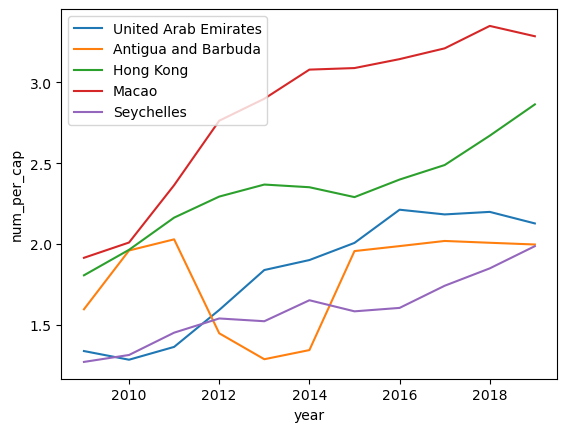

In [401]:
# Keep only rows with specified country names and years 
combined_data['year'] = pd.to_numeric(combined_data['year'])
filtered_data = combined_data[combined_data['year'] >= 2009]
selected_countries = ['Macao', 'Hong Kong', 'United Arab Emirates','Antigua and Barbuda', 'Seychelles']
filtered_data = filtered_data[filtered_data['country'].isin(selected_countries)]

#create a plot that illustrates the growth rate of the countries i
sns.lineplot(x="year", y="num_per_cap", hue="country", data=filtered_data)
plt.legend(loc="upper left")
plt.show()